# Kaggle Dataset Load

In [1]:
# !kaggle datasets download -d unsdsn/world-happiness

In [2]:
# !unzip world-happiness.zip

In [3]:
# !unzip 2019.csv

# Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [5]:
twenty19 = pd.read_csv("2019.csv", )
twenty18 = pd.read_csv("2018.csv", )
twenty17 = pd.read_csv("2017.csv", )
twenty16 = pd.read_csv("2016.csv", )
twenty15 = pd.read_csv("2015.csv", )

In [6]:
twenty19['year'] = 2019
twenty18['year'] = 2018
twenty17['year'] = 2017
twenty16['year'] = 2016
twenty15['year'] = 2015

# Exploration

In [7]:
twenty15.drop(columns="Standard Error", inplace=True)

In [8]:
twenty16.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval'], inplace=True)

In [9]:
twenty17.drop(columns=['Whisker.high', 'Whisker.low'], inplace=True)

C:\Users\alisa\anaconda3\envs\ml-env\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 2015.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\alisa\anaconda3\envs\ml-env\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 2015.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\alisa\anaconda3\envs\ml-env\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 2015.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


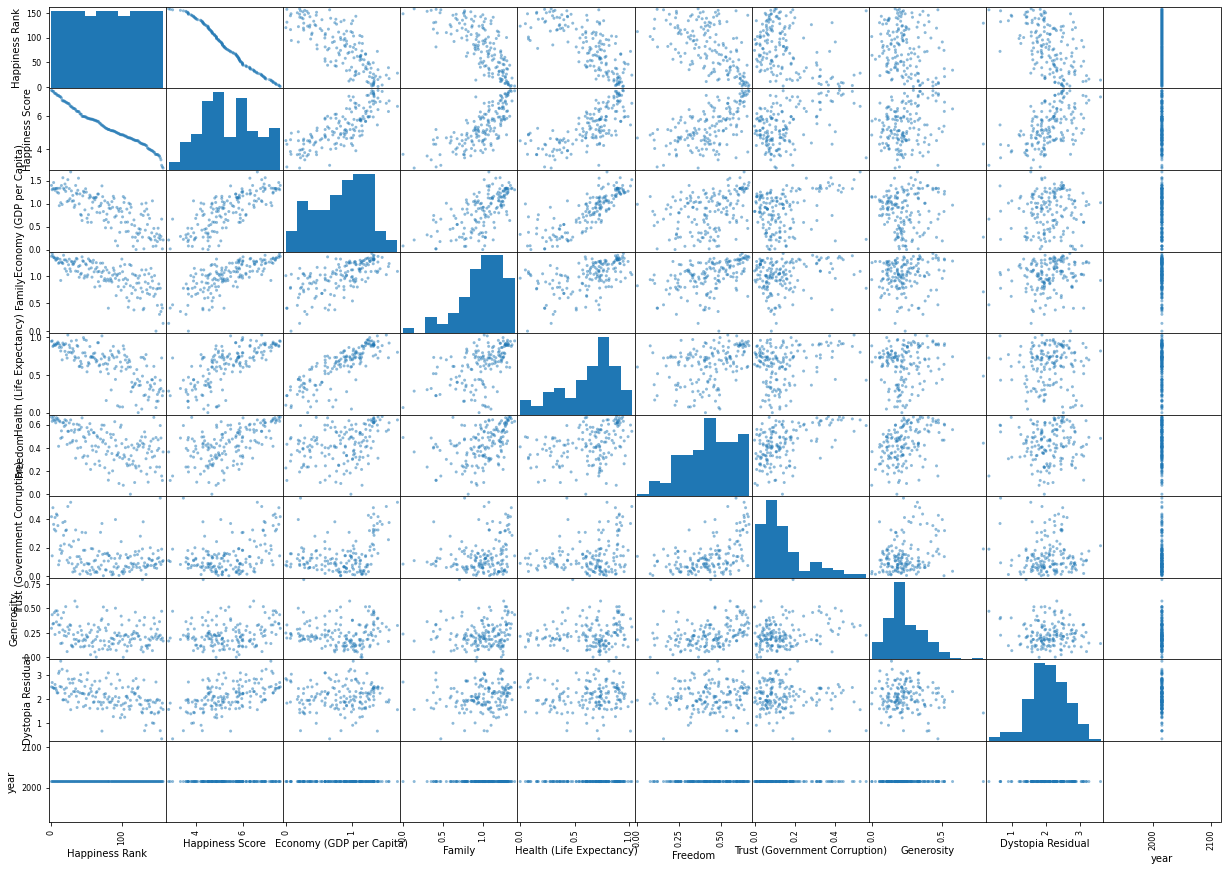

In [10]:
pd.plotting.scatter_matrix(twenty15, figsize=(21, 15),  )
plt.show()

There are def some columns that have a correlation to the happiness score. 

But, with the way the scatter matrix is displayed it is much harder to see what truly has a relationship

In [11]:
years = [twenty15, twenty16, twenty17, twenty18, twenty19]
num_years = [2015, 2016, 2017, 2018, 2019]

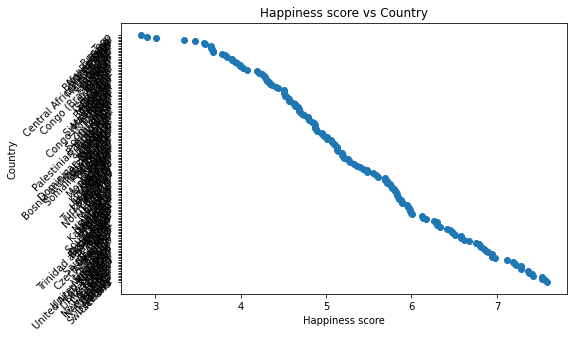

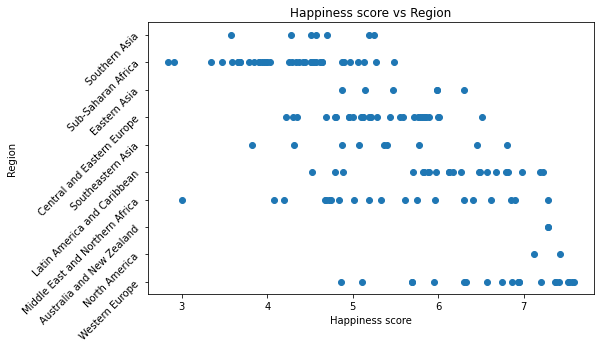

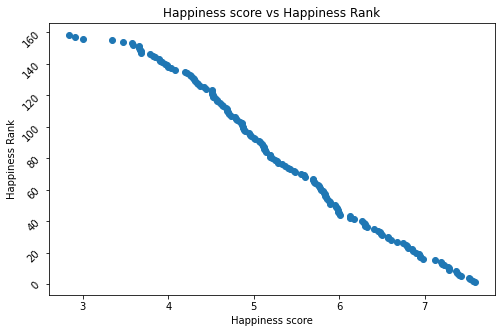

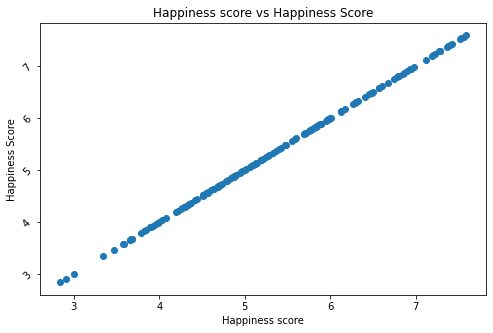

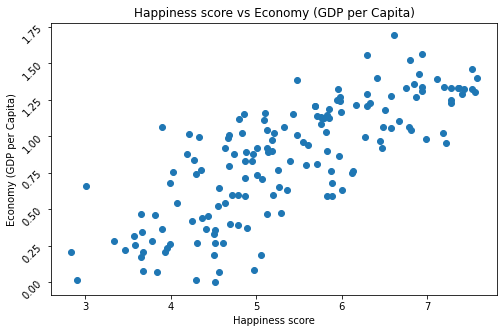

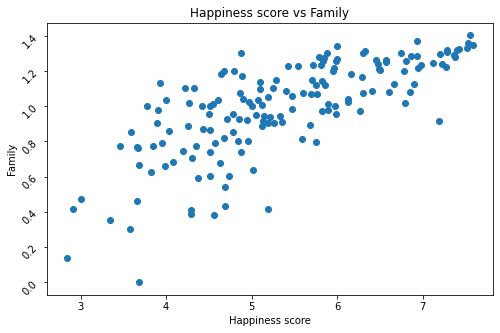

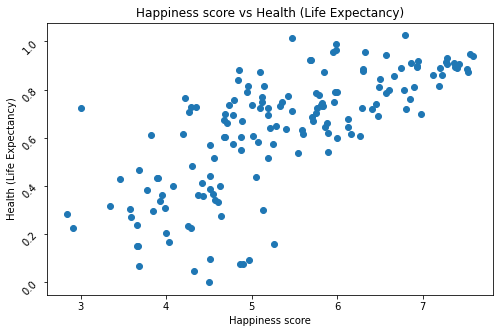

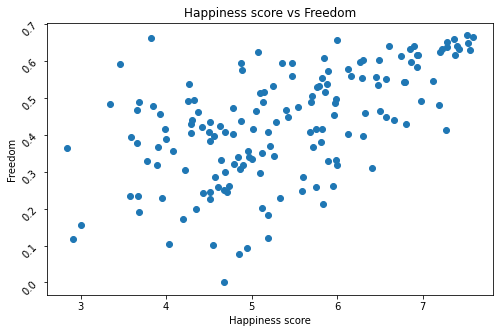

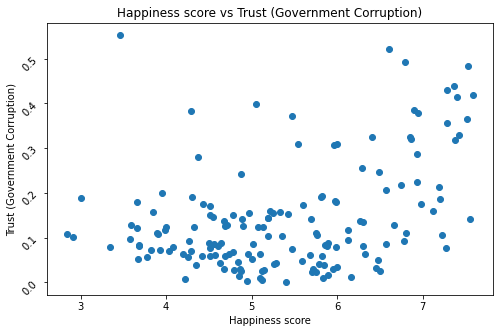

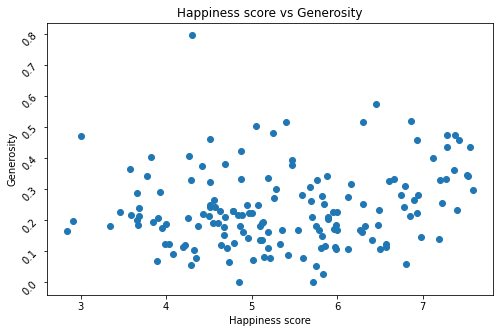

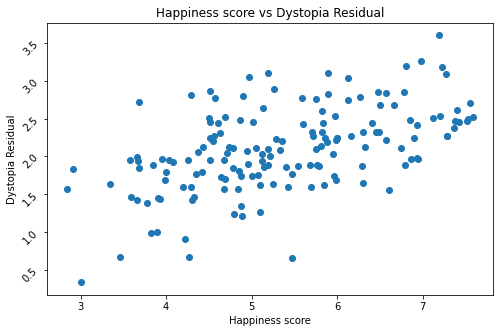

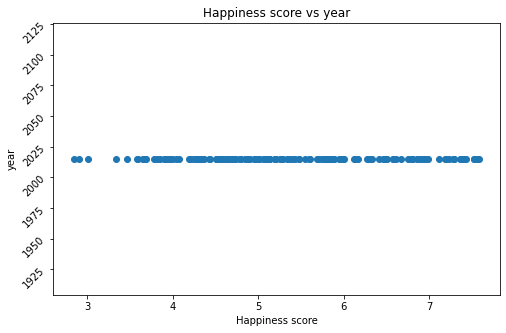

In [12]:
for col in twenty15.columns:
    plt.figure(figsize=(8,5))
    plt.scatter(twenty15['Happiness Score'], twenty15[col])
    plt.title("Happiness score vs " + col)
    plt.xlabel("Happiness score")
    plt.ylabel(col)
    plt.yticks(rotation=45)
    plt.show()

Text(0.5, 1.0, '2015 Correlation')

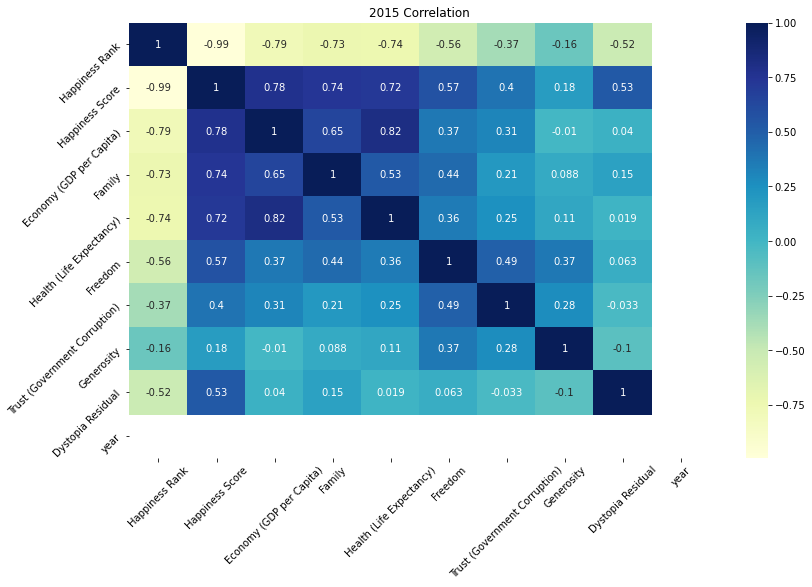

In [13]:
plt.figure(figsize=(13,8))
sns.heatmap(twenty15.corr(), annot=True, cmap="YlGnBu", )
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("2015 Correlation")

In [38]:
def correlation_heatmap(df, title):

    plt.figure(figsize=(13,8))
    sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", )
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.title(title +" Correlation Heatmap")
    plt.show()

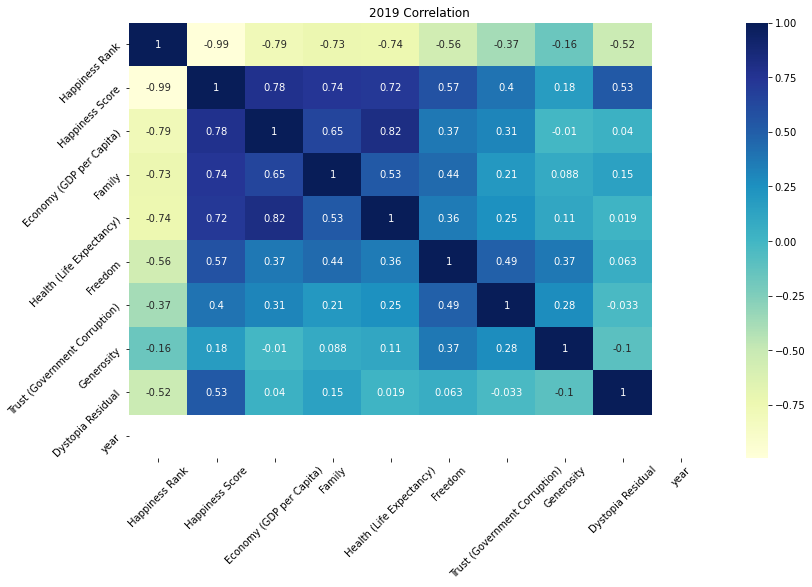

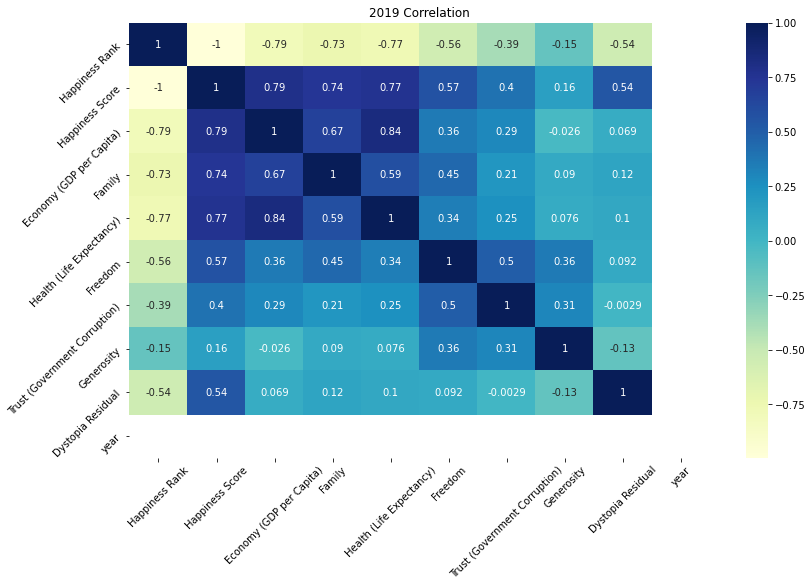

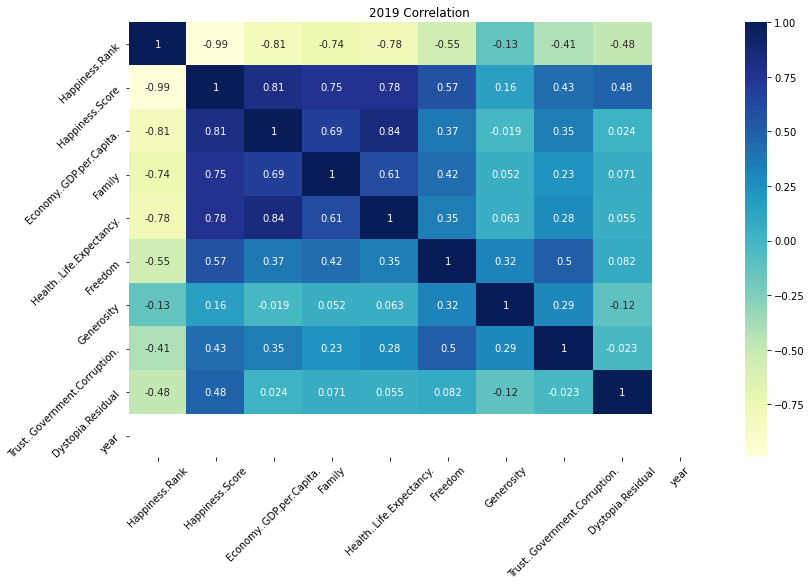

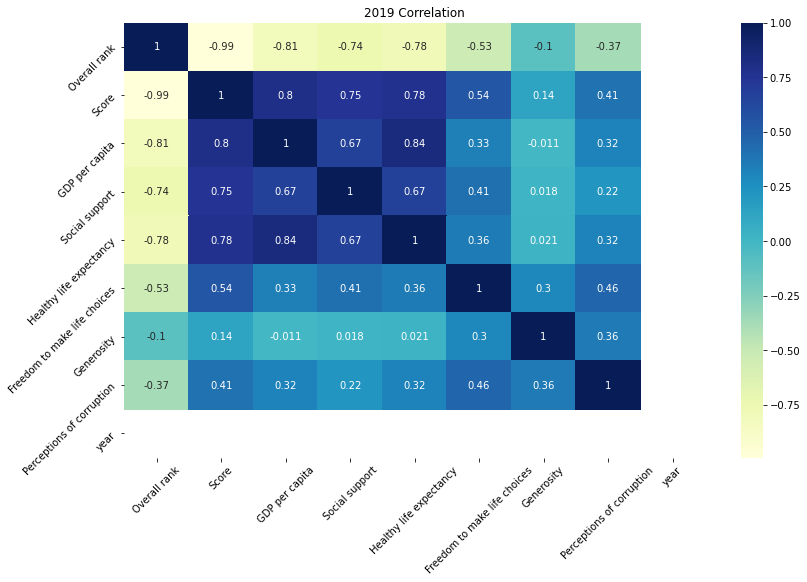

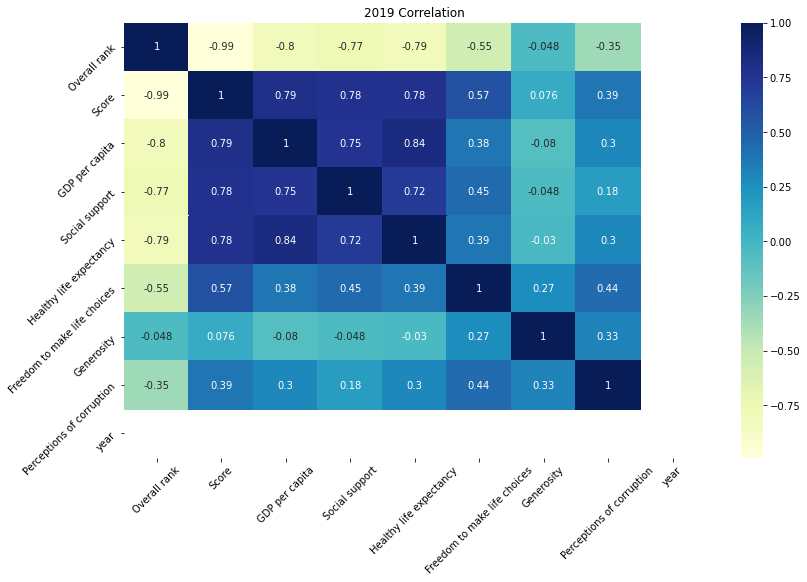

In [36]:
for year in years:
    plt.figure(figsize=(13,8))
    sns.heatmap(year.corr(), annot=True, cmap="YlGnBu", )
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.title(str(num_years[num])+" Correlation")
    plt.show()

In [25]:
for num in range(len(num_years)):
    print(num)

0
1
2
3
4


2015